In [1]:
import math
import csv
import matplotlib.pyplot as plt


Part A
Dictionary builder returns a dictionary of dictionaries containing game details of all board games that support 1 person play. 

In [2]:
def read(filename):
    """
    This function reads a csv file into a dictionary of dictionaries using the headers of the CSV file for the 
    sub-dict keys and the name of each board game for the over-arching keys. Returns one dictionary
    """
    d = {}
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        fields = next(csvreader)
        del fields [0]
        #parses through the csv file row by row
        for row in csvreader:
        #remove games that don't allow 1 person play
            if int(row[1]) <=1:
                gamename = row.pop(0)
                d2 = {}
        #parses through rows, makes sub dictionaries
                for i in range(6):
                    d2[fields[i]] = float(row[i])
                d[gamename] = d2    
    return d


In [3]:
def game_similarity(game1,game2):
    """
    This function takes two subdictionaries of values and returns the euclidean distance between the two dictionaries.
    """
    v1 = game1.values()
    v2 = game2.values()
    sums = 0
    for i, j in zip(v1, v2):
        sums += ((i - j))**2
    return math.sqrt(sums)


In [4]:
def key_list(d):
    """
    This function returns a list of keys given a dictionary
    """
    keys = list(d.keys())
    return keys


Part B

In [5]:
def pick_recommend(rankings):
    """
    This function parses through a dictionary and rearranges the key, value pairs to show from lowest to highest based 
    on the value. the function then returns the key or game name which is most similar based on the euclidean distance metric.
    The following line was adapted from the github link below which I referenced to help design the dictionary sorting capability
    https://www.askpython.com/python/dictionary/sort-a-dictionary-in-python
    """
    d2 = {key: value for key, value in sorted(rankings.items(), key=lambda x: x[1])}
    recommend = list(d2.keys())[1]
    return(recommend)

In [6]:
def pick_column(d, col):
    """
    This function takes a dictionary containing sub dictionaries as well as a column number 
    and returns a list of every value from the specified column.
    """
    lst = []
    for i in range(len(d)):
        j = list(d.values())[i]
        lst.append(list(j.values())[col])
    return(lst)


Part C

In [7]:
def rounded_lst(lst):
    """
    This function takes a list and returns a list of values rounded to a whole number
    """
    lst2 = []
    for i in range(len(lst)):
        lst2.append(round(int(lst[i])))
    return(lst2)


In [8]:
def histogram(lst):
    """
    Takes a list of rounded values and returns a dictionary showing the frequency of each value. The key of the dictionary
    is the number itself while the values are the frequency each number shows up in the list.
    """
    hist = {}
    for val in lst:
        hist[val] = hist.get(val, 0) + 1
    return(hist)

In [9]:
def bar_chart(d):
    """
    This function creates a bar chart of the average user ratings rounded to whole numbers
    """
    plt.bar(d.keys(), d.values(), width = .75, color='red')
    plt.title("Histogram of Avg User Ratings")
    plt.xlabel('Avg Rating')
    plt.ylabel('Count of Ratings')
    plt.show()
    

In [10]:
def scatter_plot(x,y):
    """
    This function creates a scatter plot with the x value of avg game weight and y value of avg user rating
    """
    plt.scatter(x,y, s=5)
    plt.xlabel("Game Weight")
    plt.ylabel("Avg User Rating")
    plt.title("Plot of Game Weight(x-axis) Against Avg User Rating(y-axis)")
    plt.show()
    

the board game most similar to Mage Knight Board Game is Star Trek  Frontiers


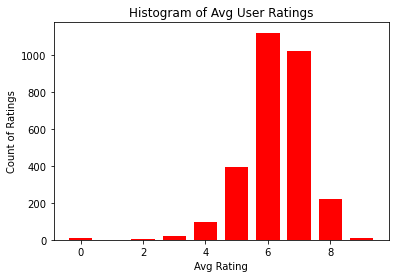

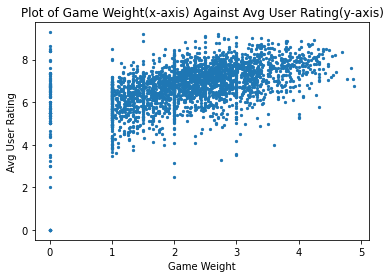

In [11]:
##part a
d = read('bgg.csv')

##part b
keys = key_list(d)
rankings = {}
favorite = 'Mage Knight Board Game'
for i in keys:
    rankings[i] = game_similarity(d.get(favorite),d.get(i))    
print("the board game most similar to",favorite, "is", pick_recommend(rankings))

##part c
rounded = rounded_lst(pick_column(d, 4))
bar_chart(histogram(rounded))
scatter_plot(pick_column(d,5),pick_column(d,4))


Part D: 
    Based on the second plot showing game weight plotted against avg user rating, one can gather that there is a somewhat strong positive correlation between the two variables. As a game manufacturer, we must be very cognisent of the dependent variable in this case, as high user ratings can quickly propel the overall consumer awareness of your product. By creating a game that is more complex and therefore heavier, we are more likely to appeal to the single player board game market, who is looking for a stimulating and challenging game. That being said, we must be conscious of the development costs as well as any manufacturing costs required to create a such a board game. A more complex game will be much more difficult to make, and will require much more refinement extending the build time and cost. For the first game to market, I would recommend something around the weight of 3. This will be a game that is on the heavier side and will inherently be more complex, but not so complex that it will take years and countless thousands to create. One more factor to take into account would be the minplaying time of the game. We want something that will take 2-3 hours to complete, as this will be stimulating for the player, without being too bold by taking up all of their time. While min play time and game weight are important factors for creating games players are more likely to enjoy, the true determining factor will be the quality of the game, which must exceed the level of the competition to succeed in the market. This superceeds all other factors.
    